In [42]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import json

In [138]:
nodes_df = pd.read_csv('data/nodes.csv', index_col=0,sep = ',')
edges_df = pd.read_csv('data/edges.csv')

nodes_df[' viz'] = nodes_df[' viz'].apply(lambda row: row.replace("'", '"')).apply(json.loads)
nodes_df['size'] = nodes_df[' viz'].apply(lambda row: row['size'] * 20)

nodes_df[' _pos'] = nodes_df[' _pos'].apply(lambda row: (float(row[7:18]), float(row[20:-2])))

In [139]:
links = edges_df['coordinates'] = edges_df.apply(lambda row: (row['# source'], row[' target'], row[' weight']), axis=1)

labels = enumerate(nodes_df[' label'])
labels = dict(labels)

pos = nodes_df[' _pos']



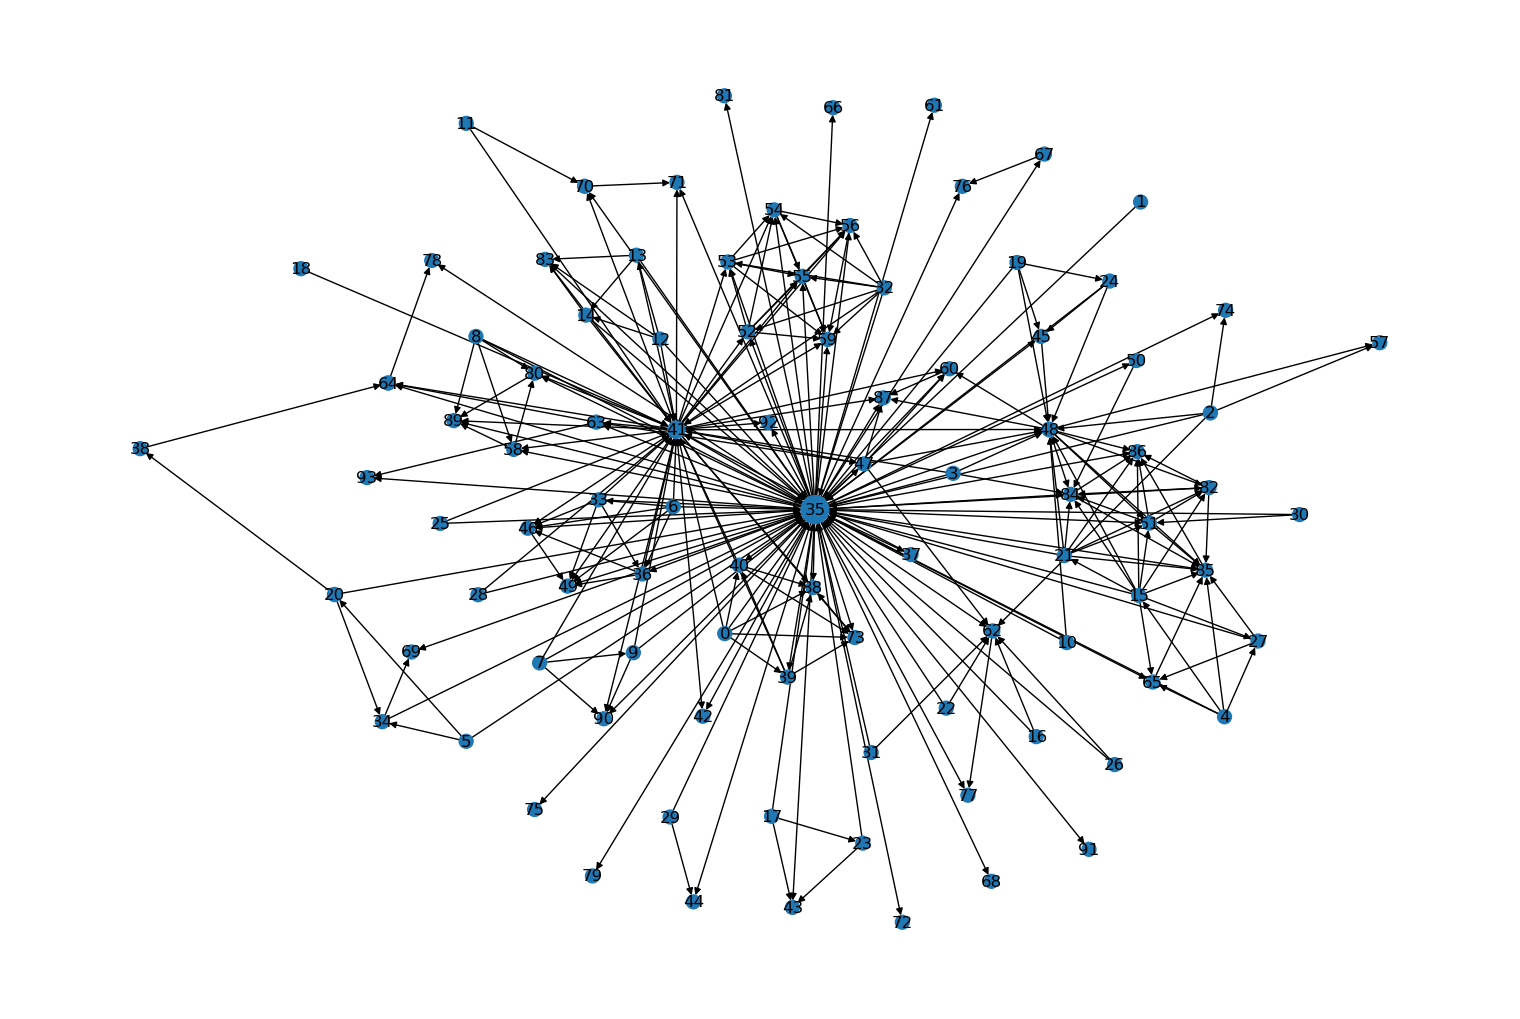

In [144]:
plt.figure(figsize=(15, 10))
G = nx.DiGraph()

for n in range(0, len(nodes_df)):
    G.add_node(n)

G.add_weighted_edges_from(links)
nx.set_node_attributes(G, labels, name = 'label')


nx.draw(G, node_size = nodes_df['size'], pos = pos, with_labels = True)

### Number of nodes

In [142]:
G.number_of_nodes()

94

### Number of edges

In [143]:
G.number_of_edges()

271

### Density

In [145]:
nx.density(G)

0.030999771219400594